Source: https://www.statista.com/statistics/1323381/monthly-methanol-spot-prices-worldwide-by-region/

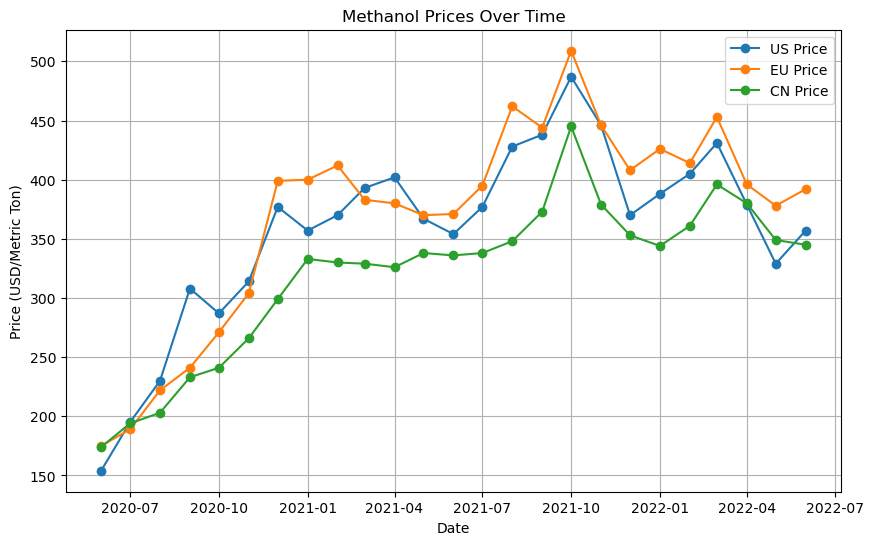

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('2_1_Monthly_Methanol_Prices.csv', parse_dates=['date'], index_col='date')

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['US_price'], marker='o', label='US Price')
plt.plot(data.index, data['EU_price'], marker='o', label='EU Price')
plt.plot(data.index, data['CN_price'], marker='o', label='CN Price')
plt.title('Methanol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD/Metric Ton)')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'{key}: {value}')
    if (result[1] > 0.5):
        print('Data has a unit root and is non-stationary. Differencing needed.')
    else:
        print('Data has no unit root and is stationary. Differencing is not needed.')
    print("\n")

# Check stationarity for each price series
print('US_price stationary check:')
check_stationarity(data['US_price'])

print('EU_price stationary check:')
check_stationarity(data['EU_price'])

print('CN_price stationary check:')
check_stationarity(data['CN_price'])

US_price stationary check:
ADF Statistic: -2.9735344735302554
p-value: 0.037440958719220416
1%: -3.9644434814814815
5%: -3.0849081481481484
10%: -2.6818144444444445
Data has no unit root and is stationary. Differencing is not needed.


EU_price stationary check:
ADF Statistic: -2.4672328225775857
p-value: 0.12365182045157819
1%: -3.7377092158564813
5%: -2.9922162731481485
10%: -2.635746736111111
Data has no unit root and is stationary. Differencing is not needed.


CN_price stationary check:
ADF Statistic: -3.083289314270437
p-value: 0.02781482561461791
1%: -3.9644434814814815
5%: -3.0849081481481484
10%: -2.6818144444444445
Data has no unit root and is stationary. Differencing is not needed.




US_price ACF and PACF:


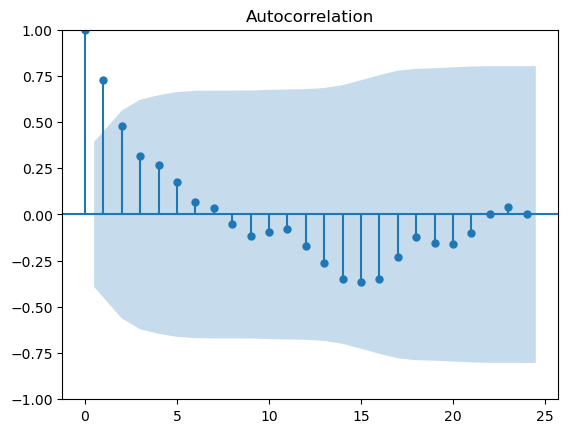

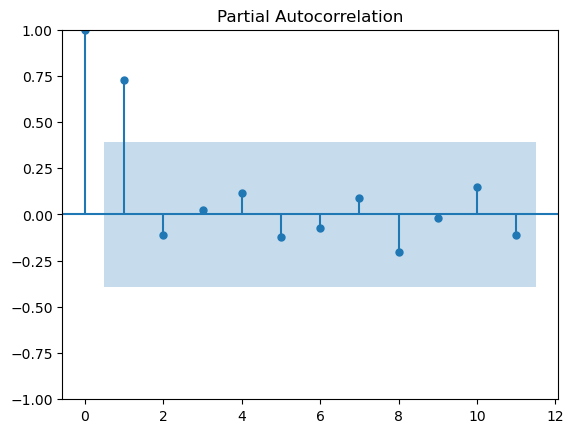



EU_price ACF and PACF:


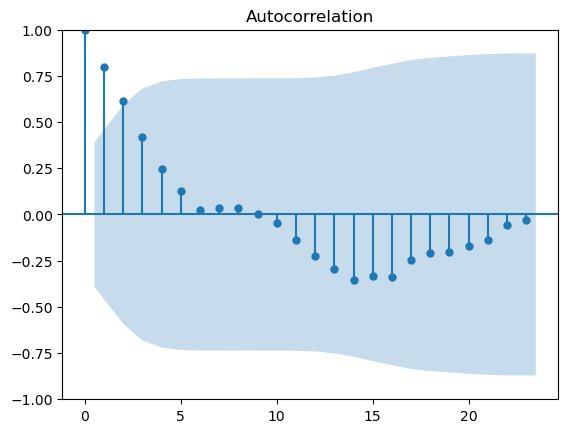

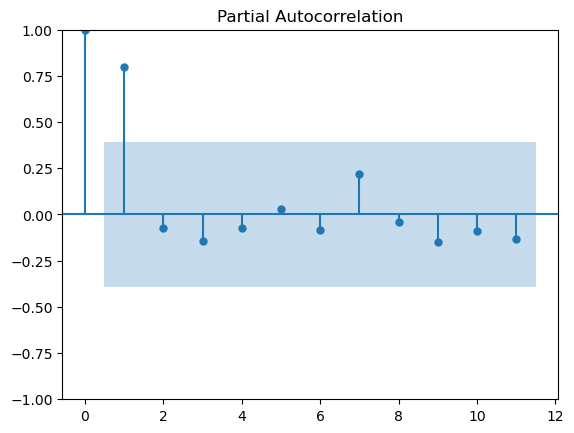



CN_price ACF and PACF:


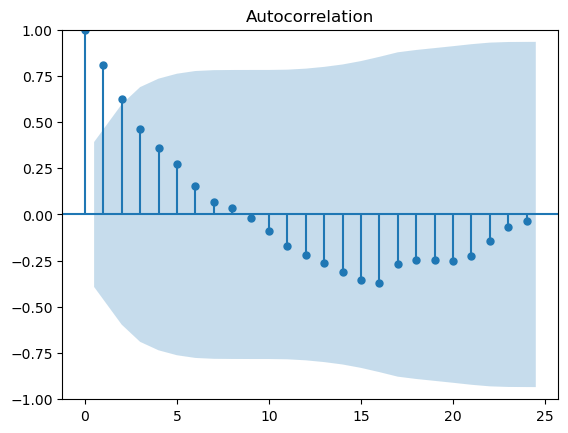

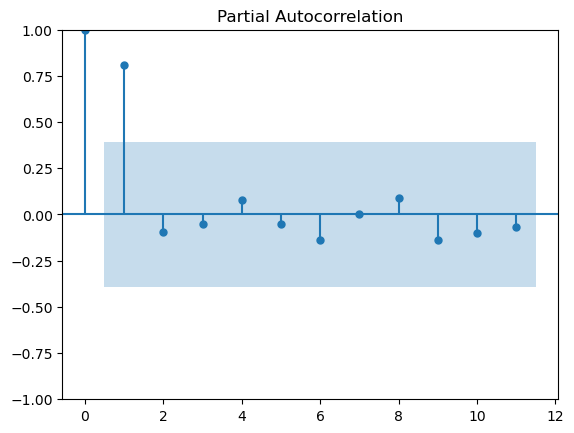

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for each differenced series
print('US_price ACF and PACF:')
plot_acf(data['US_price'].dropna(), lags=24)
plot_pacf(data['US_price'].dropna(), lags=11)
plt.show()
print('\n')

print('EU_price ACF and PACF:')
plot_acf(data['EU_price'].dropna(), lags=23)
plot_pacf(data['EU_price'].dropna(), lags=11)
plt.show()
print('\n')

print('CN_price ACF and PACF:')
plot_acf(data['CN_price'].dropna(), lags=24)
plot_pacf(data['CN_price'].dropna(), lags=11)
plt.show()
print('\n')

# Part 1: Analysis of ACF and PACF of US, EU, and CN Prices 
Since there are strong correlations at lag = 1 for both the ACF and PACF, we can start with an AR(1) time-series model to see if the predicted values seem to fit the patterns and intricacies of the data.

date
2020-06-01    154
2020-07-01    195
2020-08-01    230
2020-09-01    308
2020-10-01    287
2020-11-01    314
2020-12-01    377
2021-01-01    357
2021-02-01    370
2021-03-01    393
2021-04-01    402
2021-05-01    367
2021-06-01    354
2021-07-01    377
2021-08-01    428
2021-09-01    438
2021-10-01    487
2021-11-01    446
2021-12-01    370
2022-01-01    388
2022-02-01    405
2022-03-01    431
2022-04-01    379
2022-05-01    329
2022-06-01    357
Name: US_price, dtype: int64
                            AutoReg Model Results                             
Dep. Variable:               US_price   No. Observations:                   25
Model:                     AutoReg(1)   Log Likelihood                -117.248
Method:               Conditional MLE   S.D. of innovations             32.021
Date:                Thu, 25 Jul 2024   AIC                            240.496
Time:                        15:30:52   BIC                            244.030
Sample:                    07-01-2020   HQ

c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


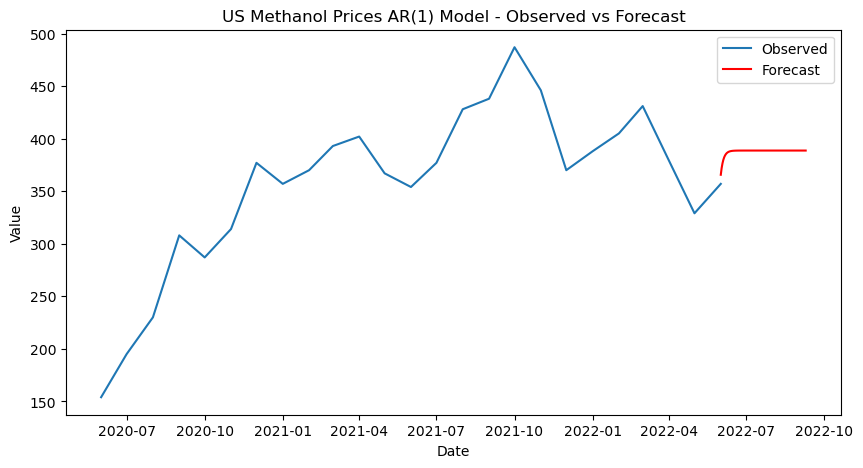

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

start_date = '2020-06-01'
end_date = '2022-06-01'
y = data.loc[start_date:end_date, 'US_price']
print(y)

# Fit AR(1) model
model = AutoReg(y, lags=1)
model_fit = model.fit()
print(model_fit.summary())

# Make predictions
n_forecast = 100  # number of steps to forecast
forecast = model_fit.predict(start=len(y), end=len(y)+n_forecast, dynamic=False)

# Create a date range for forecasted values
last_date = y.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_forecast + 1)

# Plot the observed data and the forecasted values
plt.figure(figsize=(10, 5))
plt.plot(y.index, y, label='Observed')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('US Methanol Prices AR(1) Model - Observed vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

date
2020-06-01    175
2020-07-01    189
2020-08-01    222
2020-09-01    241
2020-10-01    271
2020-11-01    304
2020-12-01    399
2021-01-01    400
2021-02-01    412
2021-03-01    383
2021-04-01    380
2021-05-01    370
2021-06-01    371
2021-07-01    395
2021-08-01    462
2021-09-01    444
2021-10-01    509
2021-11-01    446
2021-12-01    408
2022-01-01    426
2022-02-01    414
2022-03-01    453
2022-04-01    396
2022-05-01    378
2022-06-01    392
Name: EU_price, dtype: int64
                            AutoReg Model Results                             
Dep. Variable:               EU_price   No. Observations:                   25
Model:                     AutoReg(1)   Log Likelihood                -117.684
Method:               Conditional MLE   S.D. of innovations             32.608
Date:                Thu, 25 Jul 2024   AIC                            241.367
Time:                        15:30:52   BIC                            244.901
Sample:                    07-01-2020   HQ

c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


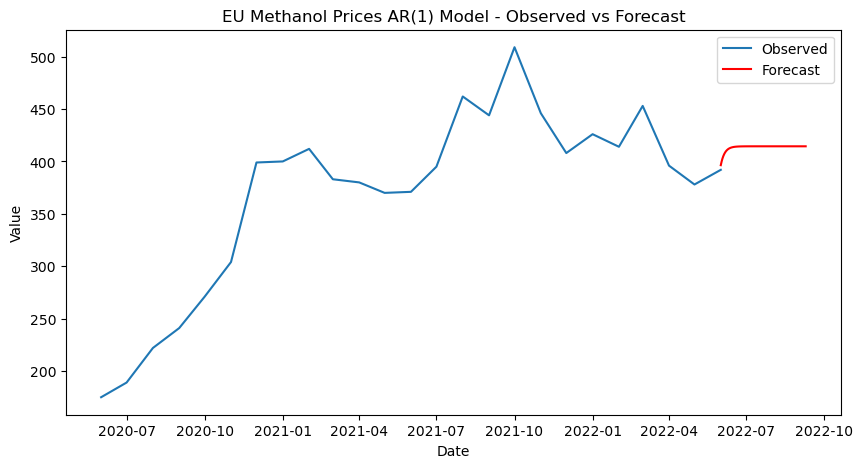

In [5]:
start_date = '2020-06-01'
end_date = '2022-06-01'
y = data.loc[start_date:end_date, 'EU_price']
print(y)

# Fit AR(1) model
model = AutoReg(y, lags=1)
model_fit = model.fit()
print(model_fit.summary())

# Make predictions
n_forecast = 100  # number of steps to forecast
forecast = model_fit.predict(start=len(y), end=len(y)+n_forecast, dynamic=False)

# Create a date range for forecasted values
last_date = y.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_forecast + 1)

# Plot the observed data and the forecasted values
plt.figure(figsize=(10, 5))
plt.plot(y.index, y, label='Observed')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('EU Methanol Prices AR(1) Model - Observed vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

date
2020-06-01    174
2020-07-01    194
2020-08-01    203
2020-09-01    233
2020-10-01    241
2020-11-01    266
2020-12-01    299
2021-01-01    333
2021-02-01    330
2021-03-01    329
2021-04-01    326
2021-05-01    338
2021-06-01    336
2021-07-01    338
2021-08-01    348
2021-09-01    373
2021-10-01    445
2021-11-01    379
2021-12-01    353
2022-01-01    344
2022-02-01    361
2022-03-01    396
2022-04-01    380
2022-05-01    349
2022-06-01    345
Name: CN_price, dtype: int64
                            AutoReg Model Results                             
Dep. Variable:               CN_price   No. Observations:                   25
Model:                     AutoReg(1)   Log Likelihood                -110.023
Method:               Conditional MLE   S.D. of innovations             23.697
Date:                Thu, 25 Jul 2024   AIC                            226.046
Time:                        15:30:53   BIC                            229.580
Sample:                    07-01-2020   HQ

c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


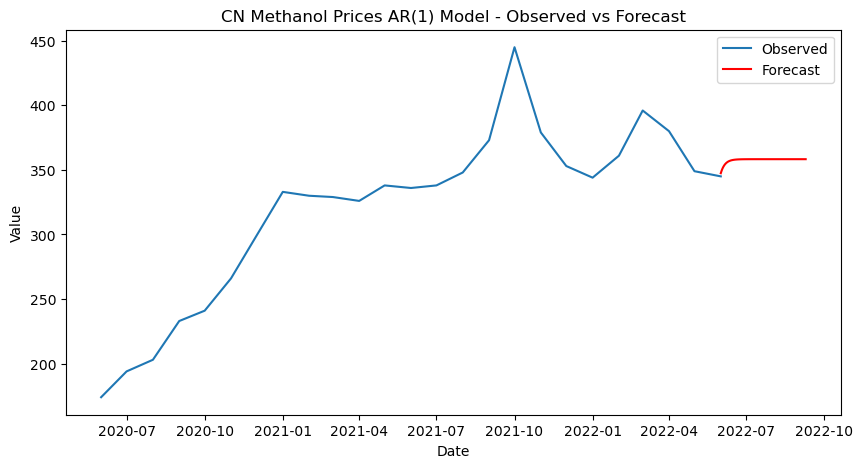

In [6]:
start_date = '2020-06-01'
end_date = '2022-06-01'
y = data.loc[start_date:end_date, 'CN_price']
print(y)

# Fit AR(1) model
model = AutoReg(y, lags=1)
model_fit = model.fit()
print(model_fit.summary())

# Make predictions
n_forecast = 100  # number of steps to forecast
forecast = model_fit.predict(start=len(y), end=len(y)+n_forecast, dynamic=False)

# Create a date range for forecasted values
last_date = y.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_forecast + 1)

# Plot the observed data and the forecasted values
plt.figure(figsize=(10, 5))
plt.plot(y.index, y, label='Observed')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('CN Methanol Prices AR(1) Model - Observed vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Part 2: Analysis of AR(1) Time Series Model for US, EU, and CN Prices
The forecasted values do not capture the patterns and intricacies of the previous data. Thus, we will pivot into using an ARMA(1,1) model instead. Since both the ACF and PACF indicate strong correlation at lag 1, an ARMA model might provide a better fit by incorporating a moving average component to the data.

Modeling for US_price...
                               SARIMAX Results                                
Dep. Variable:               US_price   No. Observations:                   25
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -127.207
Date:                Thu, 25 Jul 2024   AIC                            262.415
Time:                        15:30:56   BIC                            267.290
Sample:                    06-01-2020   HQIC                           263.767
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        322.5114     47.904      6.732      0.000     228.620     416.402
ar.L1          0.8637      0.103      8.400      0.000       0.662       1.065
ma.L1          0.2944      

c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


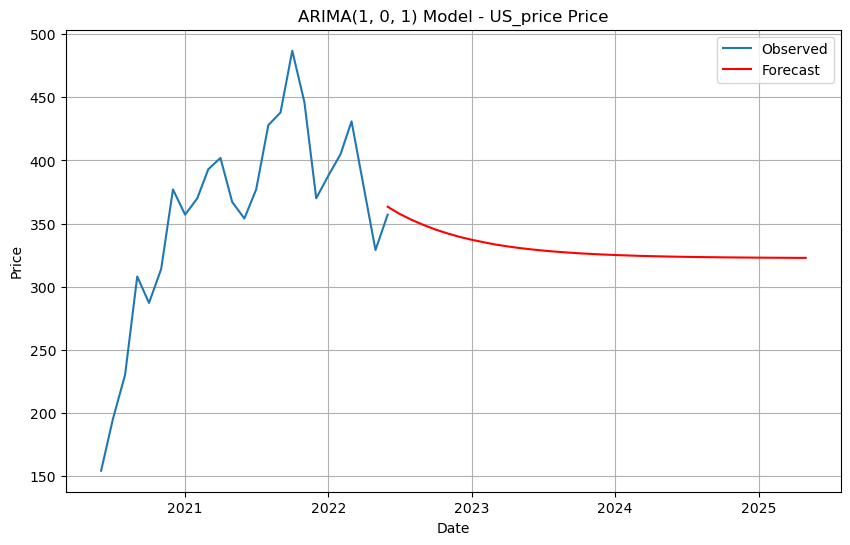

Modeling for EU_price...
                               SARIMAX Results                                
Dep. Variable:               EU_price   No. Observations:                   25
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -127.014
Date:                Thu, 25 Jul 2024   AIC                            262.028
Time:                        15:30:56   BIC                            266.904
Sample:                    06-01-2020   HQIC                           263.381
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        325.9129     62.914      5.180      0.000     202.603     449.223
ar.L1          0.9278      0.083     11.207      0.000       0.766       1.090
ma.L1          0.0322      

c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


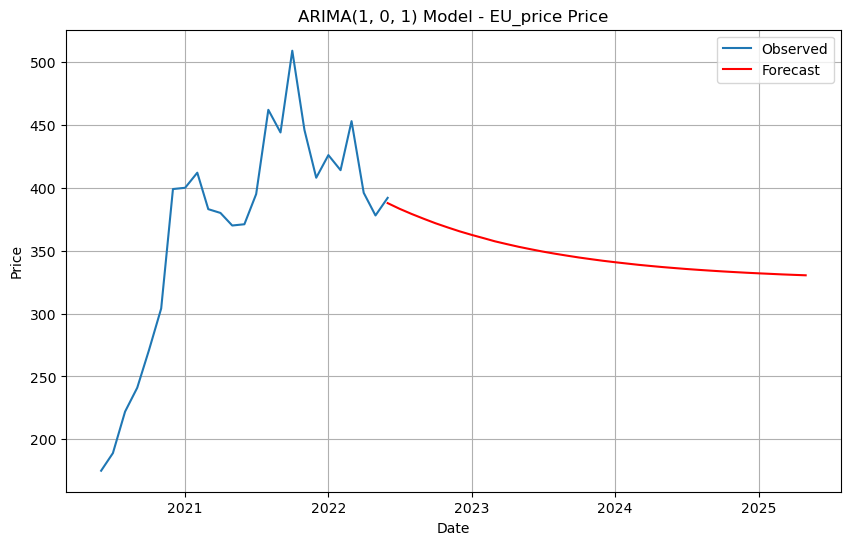

Modeling for CN_price...
                               SARIMAX Results                                
Dep. Variable:               CN_price   No. Observations:                   25
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -118.796
Date:                Thu, 25 Jul 2024   AIC                            245.592
Time:                        15:30:57   BIC                            250.467
Sample:                    06-01-2020   HQIC                           246.944
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        291.0900     54.714      5.320      0.000     183.853     398.327
ar.L1          0.9159      0.159      5.770      0.000       0.605       1.227
ma.L1          0.1883      

c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Whati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


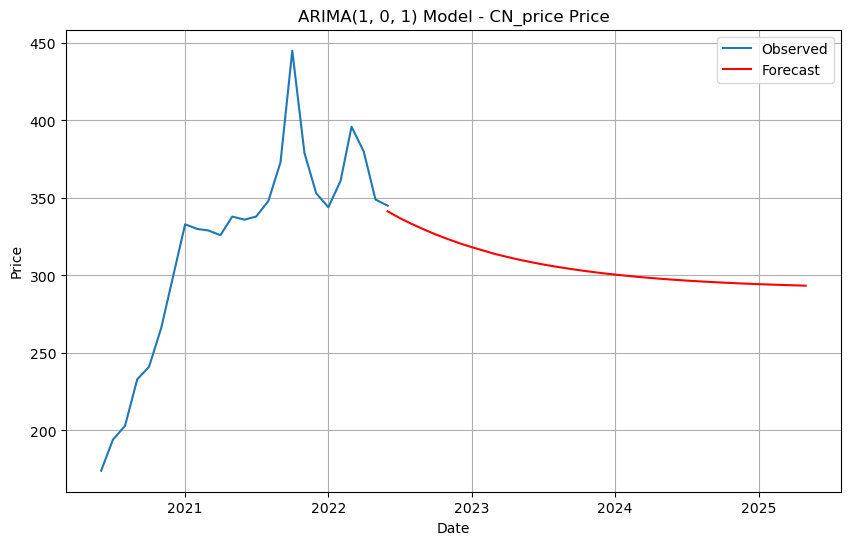

In [7]:
# Function to fit and forecast ARIMA model for a given series
def fit_arima_and_forecast(series, order):
    # Fit ARIMA model
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    
    # Forecast next 24 months (change as needed)
    forecast_steps = 36
    forecast = model_fit.forecast(steps=forecast_steps)
    
    # Print model summary
    print(model_fit.summary())
    
    # Plotting observed and forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series, label='Observed')
    plt.plot(pd.date_range(series.index[-1], periods=forecast_steps, freq='MS'), forecast, label='Forecast', color='red')
    plt.title(f'ARIMA{order} Model - {series.name} Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fit and forecast ARIMA models for each price column
for col in ['US_price', 'EU_price', 'CN_price']:
    print(f"Modeling for {col}...")
    series = data[col]
    
    # Example ARIMA orders: (p, d, q)
    # Adjust orders as needed based on diagnostics (ACF/PACF plots, stationarity tests)
    if col == 'US_price':
        order = (1, 0, 1)  # Example orders, adjust as needed
    elif col == 'EU_price':
        order = (1, 0, 1)
    elif col == 'CN_price':
        order = (1, 0, 1)
    
    fit_arima_and_forecast(series, order)


# Part 3: Conclusions on Methanol Market Trends
The ARIMA model shows a slightly negative trend for the price of Methanol. However, growing demand for alternative fuel applications, methanol-to-olefins technology, and green methanol uses most likely will outweigh this negative trend in future years. If the research had access to very recent data from 2022-2024, the data would be able to account for these recent advancements and incentives, and would thus support the conclusion that Methanol has at the very least a stable market. Analysis of the PACF also shows that all three regions' respective methanol prices have a direct correlation with the methanol price a month before due to a strong correlation at lag = 1 in the graphs, which support the analysis that near-term returns are achievable in the methanol market.